# Machine Learning PS 2

In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve

## 1. Chapter 4 Classification

### 1.1 Q5
(a) If the Bayes decision boundary is linera, we would expect QDA to perform better on the training set because it may overfit the data due to its' flexibility to fit non-linear relation. However, we would expect LDA to perform better on the test data if the Bayes decision boundary is linear

(b) If the Bayes decision boundary is non-linear, we would expect QDA to perform better on both the trainign and test datadue to its flexibility to fit non-linear relationships. However, the magnitude of performance improvement compared to LDA depends on the specific nonlinearity type

(c) As the sample size n increases, we would expect the prediction accuracy of QDA to improve compared to LDA. That is because larger sample size will reduce the varaince and then reduce the probability of QDA to overfit non-linear data. That applies to both linear and non-linear Bayes decision boundary cases.

(d) False. If the bayes decision boundary is linear, the highly flexible QDA models will be pront to suufer from overfitting data noise and thus reduce the prediciton accuracy. The error rate will be higher with small smaple size and will likely to reduce with increased sample size, while in general LDA won't suffer from this problem, so we won't get a superior error rate by using QDA in this case

### 1.2 Q6
The logistic regression equation is:
    $$ \boxed{ln_{(agrade)} = -6 + 0.05 \cdot study\_hrs + 1 \cdot undgrd\_gpa + \varepsilon_i} $$

#### (a) Prediction for student studying 40 hrs and with a 3.5 undergrad gpa
- For a student with a *3.5 undergrad gpa and who spent 40 hours studying*, the estimated probability of the student to get an A in the statistics class is __37.8%__ :

$$ \hat\Pr (ascore = 1 | study\_hrs = 40, undgrd\_gpa = 3.5) = \frac{exp (-6 + 0.05\times40 + 1\times3.5)}{1 + exp (-6 + 0.05\times40 + 1\times3.5)} = 0.378 $$

In [2]:
# Set input values
beta = np.array([-6, 0.05, 1])
dat = np.array([1, 40, 3.5])
# Estimation
prob_ascore = np.exp(beta@dat) / (1 + np.exp(beta@dat))
print(np.round(prob_ascore, 3))

0.378


#### (b) Study Hours Required to Get an A for a Student with 3.5 Undergrad GPA
- For a *student with a 3.5 undergrad gpa*, based on the logistic regression model, to *get an estimated chance of 50% to get an A* in the Statistics class, the student needs to study for __50 hours__, which is 10 hours more extra work than (a)
- *<u>Step 1<u/>*
$$\Pr (ascore = 1 | study\_hrs = x, undgrd\_gpa = 3.5) = 0.5\\= \frac{exp (-6 + 0.05\cdot x+ 1\cdot 3.5)}{1 + exp (-6 + 0.05\cdot x+ 1\cdot 3.5)}\\= \frac{exp (-2.5 + 0.05\cdot x)}{1 + exp (-2.5 + 0.05\cdot x)}$$
- *<u>Step 2<u/>*
$$0.5 = \frac{exp (-2.5 + 0.05\cdot x)}{1 + exp (-2.5 + 0.05\cdot x)}$$
<br>
$$ 0.5[1 + exp (-2.5 + 0.05\cdot x)] = exp(-2.5 + 0.05\cdot x)$$
<br>
$$ 0.5 = 0.5[exp (-2.5 + 0.05\cdot x)]\\ 1 = exp(-2.5 + 0.05\cdot x)$$
- *<u>Step 3<u/>*
$$ln(1) = -2.5 +  0.05\cdot x $$
$$ x = 50(hours)$$


In [3]:
# Set input values
prob_score = 0.5
# Estimated studying hours required to get a 50% chance of getting an A in the class
study_hrs = 2.5 / 0.05
print(study_hrs)

50.0


### 1.2 Q7
Given last year's percentage profit was 4, based on the information, we will predict that there is __75.2% chance__ a company will issue a dividend this year

- The naive bayes equation is:
    $$ \boxed{Pr(Y = k | X = x) = \frac{\pi_k \cdot f_k(x)}{\sum \limits_{\mathcal{l} = 1} ^ {K} \pi_\mathcal{l} \cdot f_\mathcal{l}(x)}} $$
- In this case, we have:
$$ P(dividend = yes | pct\_profit = 4) = \frac{\pi_{yes} \cdot f_{yes}(x)}{\sum \limits_{\mathcal{l} = 1} ^ {K} \pi_\mathcal{l} \cdot f_\mathcal{l}(x)} \\= \frac{\pi_{yes} \cdot exp(-\frac{1}{2\sigma^2} (x - \mu_{yes})^ 2)}{\sum \limits_{\mathcal{l} = 1} ^ {K} \pi_\mathcal{l} \cdot exp(-\frac{1}{2\sigma^2} (x - \mu_\mathcal{l})^ 2)} \\= \frac{\pi_{yes} \cdot exp(-\frac{1}{2\sigma^2} (x - \mu_{yes})^ 2)}{\pi_{yes} \cdot exp(-\frac{1}{2\sigma^2}(x - \mu_{yes}) ^2) + \pi_{no} \cdot exp(-\frac{1}{2\sigma^2}(x - \mu_{no}) ^2)}$$ 
<br>
- *Substitute the input values to the equation*:
$$P_{yes}(4) = \frac{0.8 \cdot exp(-\frac{1}{2 \cdot 36} (x - 10)^ 2)}{0.8 \cdot exp(-\frac{1}{2 \cdot 36}(x - 10) ^2) + 0.2 \cdot exp(-\frac{1}{2 \cdot 36}(x - 0) ^2)}\\= 0.7519$$


In [4]:
# Calculate the probability
# Set input value
prob_yes = 0.8
prob_no = 0.2
prior_profit = 4
mean_profit_yes = 10
mean_profit_no = 0
var = 36
# Define equation
numerator_yes = prob_yes * np.exp(-(1/(2*var)*np.power(prior_profit - mean_profit_yes, 2)))
denominator_no = prob_no * np.exp(-(1/(2*var)*np.power((prior_profit - mean_profit_no), 2)))
# Calculate
print(f'The probability that a company will issue a dividend this year given last year percentage profit was four will be {np.round(numerator_yes/(numerator_yes + denominator_no), 4)}')

The probability that a company will issue a dividend this year given last year percentage profit was four will be 0.7519


### 1.4 Q14
- There are 392 observations with 10 columns in this dataset. No missing data has been found
- Reference: Lab Material

In [5]:
# Load the dataset
auto_data = pd.read_csv('Data-Auto.csv')
# Check dataset
display(auto_data.head())
auto_data.shape

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,5,17.0,8,302.0,140,3449,10.5,70,1,ford torino


(392, 10)

In [6]:
# Check missing values
print(auto_data.isna().sum())
# Check data type
print(auto_data.info())
# Data distribution
auto_data.describe()

Unnamed: 0      0
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    392 non-null    int64  
 1   mpg           392 non-null    float64
 2   cylinders     392 non-null    int64  
 3   displacement  392 non-null    float64
 4   horsepower    392 non-null    int64  
 5   weight        392 non-null    int64  
 6   acceleration  392 non-null    float64
 7   year          392 non-null    int64  
 8   origin        392 non-null    int64  
 9   name          392 non-null    object 
dtypes: float64(3), int64(6), object(1)
memory usage: 30.8+ KB
None


,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,198.520408,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,114.438067,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,1.000000,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,99.750000,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,198.500000,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,296.250000,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,397.000000,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


##### a. Create binary mpg variable

In [7]:
# Create mpg01 variable
auto_data['mpg01'] = np.where(
    auto_data['mpg'] > auto_data['mpg'].median(),
    1, # mpg01 = 1 if mpg is greater than the median mpg value, ohterwise mpg01 = 0
    0
)
# Drop meaningless column
auto_data = auto_data.drop(['Unnamed: 0'], axis = 1)
# Capture targeted columns
features =  auto_data.columns.drop(['mpg', 'name'])

##### b. Explore Correlation between mpg and other variables
- Based on the plots below, we can see that __cylinders__ and __displacement__ are likely to be the most useful variables to predict *mpg01*. For both variables, those with mpg greater than median mpg value converge at a lower value range, while the distribution of both varible values for cars with mpg below the median mpg level is more evenly distributed.
- Also, we notived that __weight__ and __horsepower__ are also highly relevant to *mpg*. Both variables have higher median/mean values for cars with mpg lower than the median level.
- For *year* and *accelerations*, the correlation is not obciously differnt. For *origin*, although we notice that most *origin* for cars with *mpg* below the median level are converged at a very low level. Based on the descriptive data in (a), we know that more than half daata in this dataset has an origin value at 1. Therefore, using the *origin* variable to predict *mpg* does not make sense

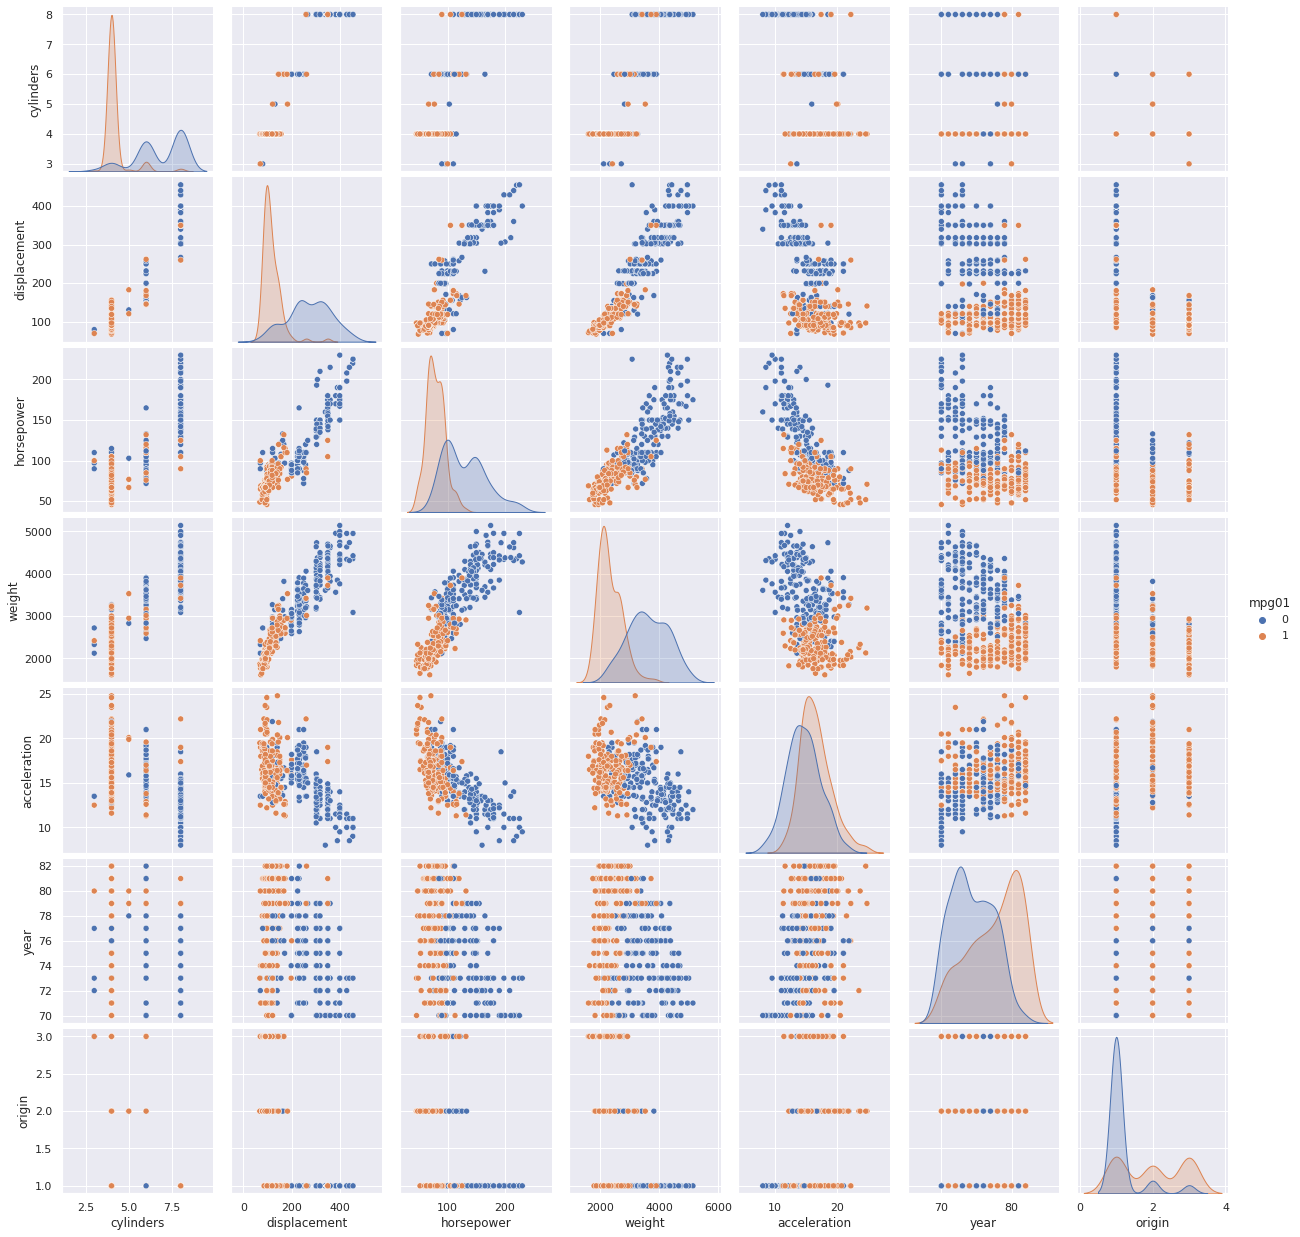

In [8]:
# Pairplot
sns.set_theme()
sns.pairplot(auto_data[features], hue = 'mpg01')

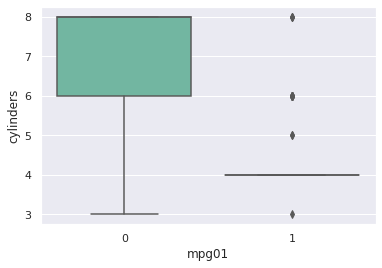

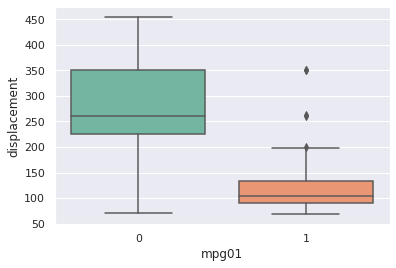

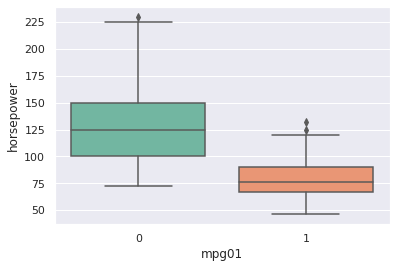

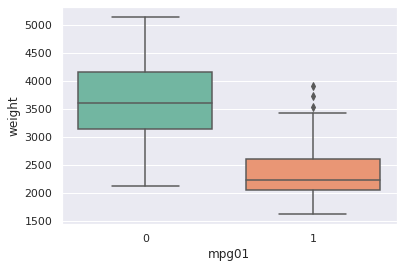

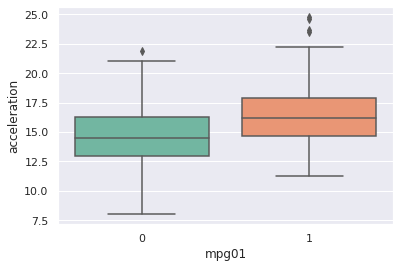

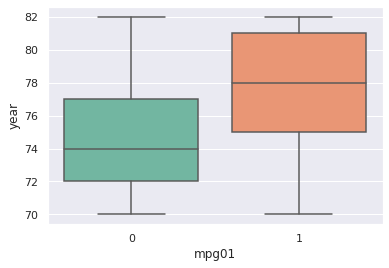

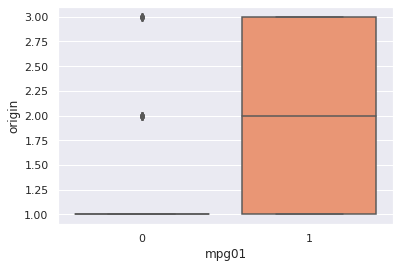

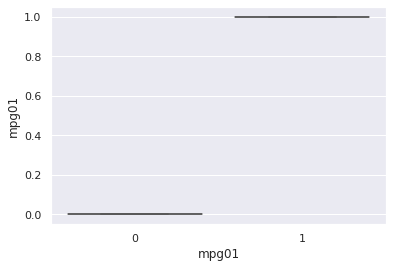

In [9]:
# Boxplot
for c in auto_data[features]:
    sns.boxplot(x = auto_data['mpg01'], y = auto_data[c], palette = "Set2")
    plt.show()

##### c. Split data into training set and test set
- Based on data spliting and balance check results, we notice that the number of cars with mpg above/below median level is evenly distributed in the testing and training data
- Also, since the regression of all observables variables on testing status has a p value greater than 0.1, we fail to reject the null hypothesis the variable values are significantly different in the testing and training dataset.

In [10]:
# Sort target and feature columns into different columns
X = auto_data[features].drop(['mpg01'], axis = 1)
y = auto_data['mpg01']

# Check data
y.value_counts()

1    196
0    196
Name: mpg01, dtype: int64

In [11]:
# Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 42)

In [12]:
# Insert the dummy variable in each set to indicate test/train status
X_train.insert(0, 'test', 0)
X_test.insert(0, 'test', 1)

# Merge
X_full = pd.concat([X_test, X_train], axis = 0)

# Featured columns for balance test
feature = X_full.columns.drop(['test'])

result = smf.ols(
    f'test ~ {"+".join(feature)}',
    data = X_full
).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   test   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9639
Date:                Thu, 02 Feb 2023   Prob (F-statistic):              0.457
Time:                        00:11:03   Log-Likelihood:                -281.10
No. Observations:                 392   AIC:                             578.2
Df Residuals:                     384   BIC:                             610.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.0788      0.699      1.543   

##### d. LDA Regression

Based on the belowing regressions

- **Logistic model and LDA** have the same <u>True Positive</u> rate at *96.88%*(they also share the same false positive rate at 3.12%), while the Logit model performe slightly better at predicting *True Negative*

- The **QDA model** performs better at predicting <u>True Negative</u>, with a rate of 81%. However, QDA model was inferior to LDA and Logit model wrt predicting <u>True Positive</u>, with a rate of *92.71%*

- The **Naive Bayes model** has the <u>lowest test error</u> among all models here. It performs slightly worse(95.83%) than the logit and QDA models wrt predicting True Positive, while having a better rate of predicting True Negative(79%) correctly. **Overall, the Naive Bayes model performs the best among all others**

Specifically, the test error for each method:
- LDA: 14.29%
- QDA: 13.27%
- Logit: 13.78%
- Naive Bayes: 12.76%

In [13]:
# Keep the most relevant columns only
features = features.drop(['year', 'acceleration', 'origin', 'mpg01'])
X_train = X_train[features]
X_test = X_test[features]

In [14]:
# Fit the LDA model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

# Compute the accuracy
accuracies = {} 
# Baseline accuracy
accuracies['baseline'] = round(y_test.value_counts().max()/len(y_test), 2)
# LDA accuracy
y_pred = lda_model.predict(X_test)
accuracies['LDA'] = accuracy_score(y_test, y_pred)

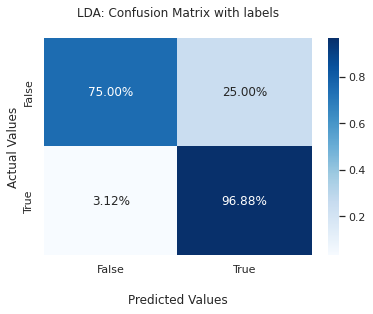

In [15]:
# Confusion Matrix
ax = sns.heatmap(
    confusion_matrix(
        y_test,
        y_pred,
        normalize = 'true'
    ),
    annot = True,
    fmt = '.2%',
    cmap = 'Blues'
)

ax.set_title('LDA: Confusion Matrix with labels\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

##### e. QDA Regression

In [16]:
# Fit QDA model
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)

# Compute accuracy
y_pred_q = qda_model.predict(X_test)
accuracies['QDA'] = accuracy_score(y_test, y_pred_q)

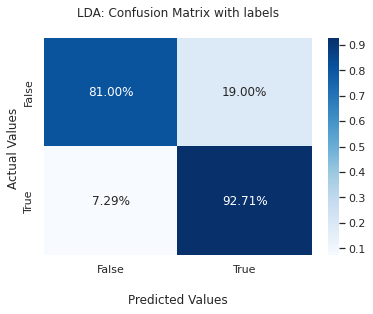

In [17]:
ax = sns.heatmap(
    confusion_matrix(
        y_test,
        y_pred_q,
        normalize = 'true'
    ),
    annot = True, 
    fmt = '.2%',
    cmap = 'Blues'
)

ax.set_title('QDA: Confusion Matrix with labels\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

##### f. Logistic Regression

In [18]:
# Fit the model
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

# Compute the accuracy
accuracies['logit'] = accuracy_score(y_test, logisticRegr.predict(X_test))

/usr/local/lib64/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

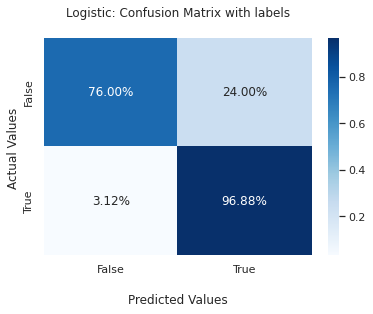

In [20]:
# Confusion Matrix
ax = sns.heatmap(
    confusion_matrix(
        y_test,
        logisticRegr.predict(X_test),
        normalize = 'true'
    ),
    annot = True, 
    fmt = '.2%',
    cmap = 'Blues'
)

# Title and Labels
ax.set_title('Logistic: Confusion Matrix with labels\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Display the visualization of the Confusion Matrix.
plt.show()

##### g. Naive Bayes Regression

In [21]:
# Convert features to numbers
from sklearn import preprocessing
# Create labelEncoder
label = preprocessing.LabelEncoder()

for c in X_test.columns:
    X_test[c] = label.fit_transform(X_test[c])
for c in X_train.columns:
    X_train[c] = label.fit_transform(X_train[c])

In [27]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Create Gaussian Classifier
bayes_model = GaussianNB()

# Fit model and predict
bayes_model.fit(X_train, y_train)
y_pred_b = bayes_model.predict(X_test)

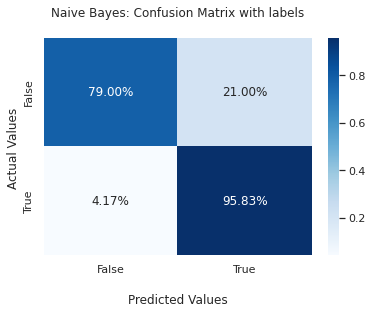

In [30]:
# Confusion Matrix
ax = sns.heatmap(
    confusion_matrix(
        y_test,
        y_pred_b,
        normalize = 'true'
    ),
    annot = True, 
    fmt = '.2%',
    cmap = 'Blues'
)

# Title and Labels
ax.set_title('Naive Bayes: Confusion Matrix with labels\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [98]:
# Print accuracy and test error
for model, accuracy in accuracies.items():
    print(f'{model} accuracy: {round(accuracy, 4)}')
    print(f'{model} test error: {round(1 - accuracy, 4)}')

log accuracy: 96.83%
log accuracy: 3.17%


## 2. Chapter 5 Resampling
- There are 10000 observations in the total in the dataset, with 4 columns detailing whether student status, default status, income and balance level

In [221]:
# Load the dataset
default_data = pd.read_csv('Data-Default.csv')
# Check dataset
display(default_data.head())
default_data.shape

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


(10000, 4)

##### a. Logistic Regression
- The overall logistic regression model has a <u>test error rate at 2.63%</u>. Specifically, it has a high rate of predicting <u>*True Negative* at 99.61%</u>, while the probability of predicting <u>*True Positive* is low</u>, with a rate of 32.43%

In [222]:
# Convert target to categorical variable
y = default_data['default'].astype('category').cat.codes # sanity check: (y.value_counts())

# Sort feature columns
features = default_data.columns.drop(['default', 'student'])
X = default_data[features]

y.value_counts()

0    9667
1     333
dtype: int64

logit accuracy: 97.37%
logit test error: 2.63%


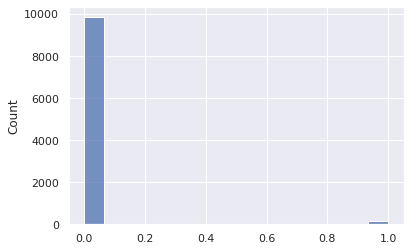

In [224]:
# Run Logit Regression
logisticRegr = LogisticRegression()
logisticRegr.fit(X, y)

# Predict
y_pred_log = logisticRegr.predict(X)
sns.histplot(y_pred_log)
# Accuracy and test error
print(f'logit accuracy: {round(accuracy_score(y, y_pred_log), 4) * 100}%')
print(f'logit test error: {round(1 - accuracy_score(y, y_pred_log), 4) * 100}%')

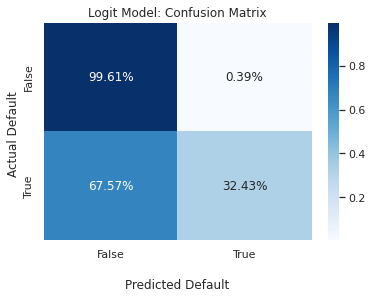

In [225]:
# Confusion Matrix
ax = sns.heatmap(
    confusion_matrix(
        y,
        y_pred_log,
        normalize = 'true'
    ),
    annot = True, 
    fmt = '.2%',
    cmap = 'Blues'
)

# Title and Labels
ax.set_title('Logit Model: Confusion Matrix')
ax.set_xlabel('\nPredicted Default')
ax.set_ylabel('Actual Default ')
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

##### b. Split data into training set and test set
- By using the validation method, the accuracy decreased a bit compared to using the overall dataset, with a rate of *96.83%* The <u>test error rate also increased to *3.17%*</u>. And the probability of predicting *True Positive* becomes even worse.
- However, we should notice that in the dataset, most individuals do not default, and that may affect model prediction

In [226]:
# (i). Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
# (ii). Fit model
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

LogisticRegression()

In [227]:
# (iii). Predict and categorize
y_pred_log = logisticRegr.predict(X_test)
y_pred_log_bin = np.where(y_pred_log > 0.5, 1, 0)
# Coefficient
logisticRegr.coef_

array([[ 0.00047684, -0.00012838]])

In [228]:
# (iv). Accuracy and test error
print(f'logit accuracy: {round(accuracy_score(y_test, y_pred_log_bin), 4) * 100}%')
print(f'logit test error: {round(1 - accuracy_score(y_test, y_pred_log_bin), 4) * 100}%')

logit accuracy: 96.83%
logit test error: 3.17%


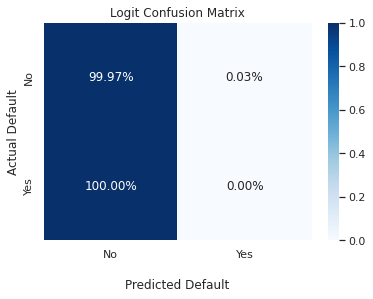

In [229]:
# Confusion matrix
ax = sns.heatmap(
    confusion_matrix(
        y_test,
        y_pred_log_bin,
        normalize = 'true'
    ),
    annot = True, 
    fmt = '.2%',
    cmap = 'Blues'
)
# Title and Labels
ax.set_title('Logit Confusion Matrix')
ax.set_xlabel('\nPredicted Default')
ax.set_ylabel('Actual Default')
ax.xaxis.set_ticklabels(['No','Yes'])
ax.yaxis.set_ticklabels(['No','Yes'])
    
plt.show()

##### c. Resampling
- Choosing random state among 2, 6, 9, we noticed that spliting the data with **random state = 2** will give us the <u>*highest accuracy rate(97.63%)*</u> and <u>*lowest test error(2.37%)*</u>
- Specifically, all models have a pretty good performance at identifying *True Negative* cases. However, in general, with the random state value increase, the ability to predicte *True Positive* signifiantly decreases.
- Among all the 3 models, setting **Random State = 6** will give us the __highest chance of predicting *True Positive* correctly (31.91%)__, which in this case probably is more of people' interest as the bank will only care about customers who default

In [230]:
# Set input
random_state = [2, 6, 9]
accuracy_scores = pd.DataFrame(columns=['random_state', 'accuracy', 'test error'])
accuracy_scores.set_index(['random_state'], inplace = True)

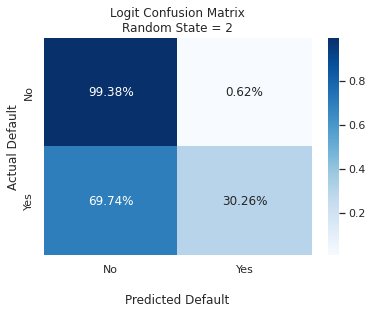

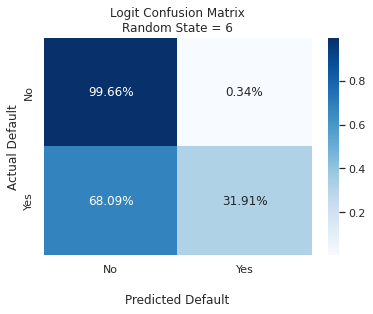

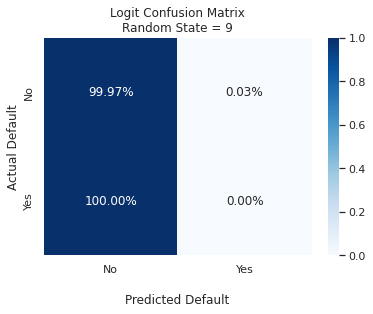

,accuracy,test error
random_state,,
2,0.976333,0.0236667
6,0.975333,0.0246667
9,0.969333,0.0306667


In [231]:
# Iterating
for r in random_state:
    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = r)

    # Logistic regression
    logisticRegr = LogisticRegression()
    logisticRegr.fit(X_train, y_train)
    
    # Predict
    y_pred_log = logisticRegr.predict(X_test)
    y_pred_log_bin = np.where(y_pred_log > 0.5, 1, 0)
    
    # Analysis
    # Confusion matrix plot
    ax = sns.heatmap(
    confusion_matrix(
        y_test,
        y_pred_log_bin,
        normalize = 'true'
    ),
    annot = True, 
    fmt = '.2%',
    cmap = 'Blues'
    )
    # Title and Labels
    ax.set_title(f'Logit Confusion Matrix\nRandom State = {r}')
    ax.set_xlabel('\nPredicted Default')
    ax.set_ylabel('Actual Default')
    ax.xaxis.set_ticklabels(['No','Yes'])
    ax.yaxis.set_ticklabels(['No','Yes'])
    
    plt.show()
    # Accuracy and test error
    accuracy_scores.loc[r, :] = [accuracy_score(y_test, y_pred_log_bin), 1 - accuracy_score(y_test, y_pred_log_bin)]
    
display(accuracy_scores)

##### d. Adding Student Dummy
- Adding the student dummy variable **does not appear to reduce the test error rate**. <u>The accuracy is *96.83%* and the test error rate is *3.17%*</u>, which is pretty close to the logit model in Q(b). And the test error rate is higher than any of the models in (c) which has a lower random state value
- However, there is a large improvement in predicting *True Positive* correctly. By adding the student dummy, the <u>rate of *True Positive* is 20.21%</u> now, which is much better compared to (b) with a rate of nearly 0%. Also, with the significant improvement in predicting *True Positive*, the rate of prediciting *True negative* remain very high, with a rate of *99.31%*

In [232]:
# Convert student status to binary variable
default_data['student'] = np.where(default_data['student'] == "Yes",1, 0) 

In [233]:
# Split dataset
X = default_data.drop(['default'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Fit model
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

# Predict
y_pred_log = logisticRegr.predict(X_test)
y_pred_log_bin = np.where(y_pred_log > 0.5, 1, 0)
# Coefficient
logisticRegr.coef_

array([[-3.80773860e+00,  4.10824216e-03, -1.35591924e-04]])

In [234]:
# Accuracy and test error
print(f'logit accuracy: {round(accuracy_score(y_test, y_pred_log_bin), 4) * 100}%')
print(f'logit test error: {round(1 - accuracy_score(y_test, y_pred_log_bin), 4) * 100}%')

logit accuracy: 96.83%
logit test error: 3.17%


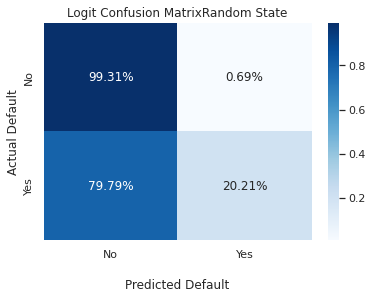

In [235]:
ax = sns.heatmap(
    confusion_matrix(
        y_test,
        y_pred_log_bin,
        normalize = 'true'
    ),
    annot = True, 
    fmt = '.2%',
    cmap = 'Blues'
    )
# Title and Labels
ax.set_title('Logit Confusion MatrixRandom State')
ax.set_xlabel('\nPredicted Default')
ax.set_ylabel('Actual Default')
ax.xaxis.set_ticklabels(['No','Yes'])
ax.yaxis.set_ticklabels(['No','Yes'])
    
plt.show()